In [5]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.datasets import load_diabetes

#importing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures




In [13]:
#import dataset
diab=load_diabetes()

#defining feature and label
X=diab['data']
y=diab['target']

#print shape
print(X.shape,y.shape)

(442, 10) (442,)


In [14]:
#creating dataframe from X
df=pd.DataFrame(X,
               columns=['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu'])

#adding 'progression' from y
df['progression']=diab['target']

#showing head
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [15]:
#showing dataframe info
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

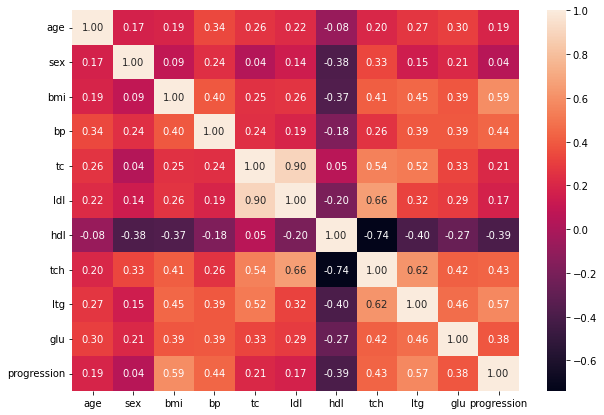

In [16]:
#figure size
plt.figure(figsize=(10,7))

#correlation matrix
dataplot=sns.heatmap(df.corr(),annot=True,fmt='.2f')

<Figure size 720x504 with 0 Axes>

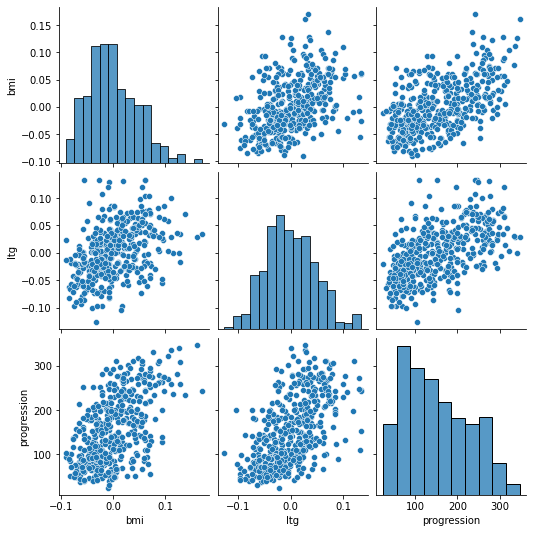

In [17]:
#figure size
plt.figure(figsize=(10,7))

#plotting graphs
sns.pairplot(df[['bmi','ltg','progression']])

Text(0, 0.5, 'PROGRESSION')

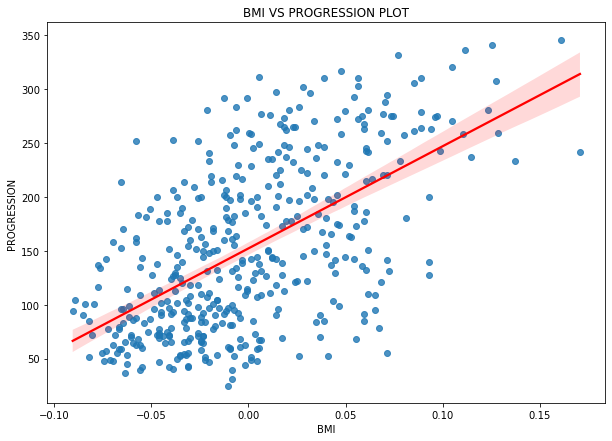

In [18]:
#figure size
plt.figure(figsize=(10,7))

#regression between bmi and progression
sns.regplot(data=df,x='bmi',
           y='progression',line_kws={"color":"red"})

#labelling
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

In [21]:
#defining features
X=df.iloc[:,:-1]

#defining label
y=df['progression']

#splitting
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,test_size=0.2,random_state=42)

#fitting the model
reg=LinearRegression().fit(X_train,y_train)

#predictions
y_test_pred=reg.predict(X_test)
y_train_pred=reg.predict(X_train)

In [37]:
#intercept
print(f'the intercept is:{reg.intercept_:.2f}')

#slope
print(f'the slope is:{reg.coef_}')

#R2
print(f'Coeff.of determination on train set:{reg.score(X_train,y_train):.2f}')
print(f'Coeff.of determination on test set:{reg.score(X_test,y_test):.2f}')
      

the intercept is:151.35
the slope is:[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Coeff.of determination on train set:0.53
Coeff.of determination on test set:0.45


In [39]:
#model metrics

print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test,y_test_pred):.2f}')

print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)):.2f}')

The mean absolute error is:42.79
The root mean squared error is:53.85


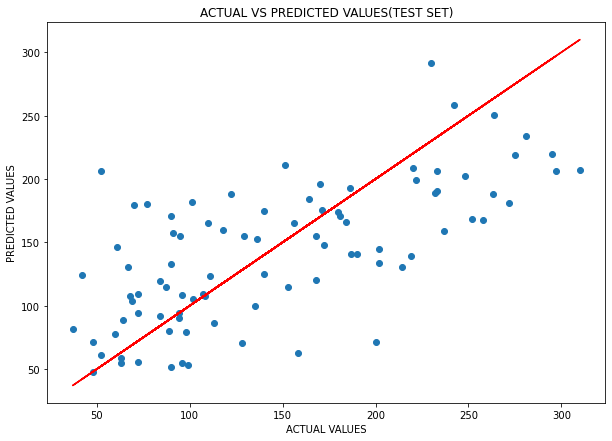

In [42]:
#image dimensions
plt.figure(figsize=(10,7))

#scatterplot of y_test and y_test_pred
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,color='r')

#labelling
plt.title('ACTUAL VS PREDICTED VALUES(TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')

#showing plot
plt.show()
           


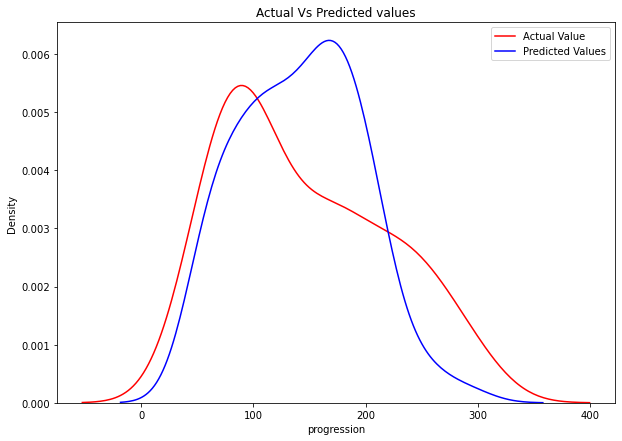

In [44]:
#image dimensions
plt.figure(figsize=(10,7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test,color='r',label="Actual Value") #sctual values
sns.kdeplot(y_test_pred,color="b",label="Predicted Values",ax=ax) #predicted values

#showing title
plt.title('Actual Vs Predicted values')
#showing legend
plt.legend()
#showing plot
plt.show()